In [1]:
import numpy as np
from numpy import exp
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib as mpl
import os
mpl.rcParams.update({'font.size': 18, 'font.family': 'sans-serif'})
from cycler import cycler


color = mpl.cm.nipy_spectral(np.linspace(0, 1, 13))
mpl.rcParams['axes.prop_cycle'] = cycler('color', color)





Define the current working directory
define a prefix for the names of the files to be imported
define the background file 

In [2]:
folder_name='\\52K_15s'
basename='52K_15s_long'
bkg_file='R64903'




You have to change the code a lot if you are moving between short and long wavelengths!

In [3]:
#define the current working directory here
working_dir=(r'C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis'+folder_name)

os.chdir(working_dir)

cwd=os.getcwd()
print('The current working directory is',cwd,'\n\nIs this correct?', sep=' ')
#os.chdir(working_dir+'\\long\\normalised')
#cwd=os.getcwd()
#print('i have now changed to a directory called',cwd,'\n\nIs this correct?', sep=' ')

The current working directory is C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis\52K_15s 

Is this correct?


Now load the background file and normalise to the beamcurrent

NOTE; you have to change the name of the wavelength file!

In [4]:
#identify the file name as a string 
i0_1=("bkg\\"+bkg_file+".dat")
#print(type(i0))
#define wavelengh (wl) i0 (measured intensity) and i0_curr (beamcurrent) as an array of strings, made up of floats, by extracting columns 0,1,6 from the text file
wl, i0, i0_curr = np.loadtxt(i0_1, dtype=float, delimiter=None, skiprows=18, usecols=(0,1,6), unpack=True)
#then normalise to the beamcurrent
i0_norm = i0/i0_curr*180

print('The array of x-values (wavelengths) is:', wl, 'and they have been saved to wavelength_long.dat', sep='\n') # the sep command tells print() to go to a new line between arguments
data=np.column_stack((wl,i0_norm))
header='wavelength/nm normalised current'
#np.savetxt('example.dat',data, header=header)
with open('wavelength_long.dat', mode='w', ) as newfile: #this generates a new .dat called newfile
    np.savetxt('wavelength_long.dat',data, header=header) # this prints the values in wl to the newfile.    



The array of x-values (wavelengths) is:
[191.  191.5 192.  192.5 193.  193.5 194.  194.5 195.  195.5 196.  196.5
 197.  197.5 198.  198.5 199.  199.5 200. ]
and they have been saved to wavelength_long.dat


We need a time stamp from each file, so we write a small script to convert the time into seconds.

In [5]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s, =time_str.split(':')
    return int(h)*3600+int(m)*60+int(s)



now load the individual wavelength scan files as a list using the "glob" command, and keep the list sorted in numerical order. All items found must begin with "R" and end ".dat" "astrix "is a wildcard and can be anything.
Then identify each element in the glob list as "f"

Don't forget to set decent starting parameters!

--------------G1----------------
amplitude = 0.78 (+/-) 0.06
center = 191.00 (+/-) 0.47
sigma = 3.58 (+/-) 0.23
--------------G2----------------
amplitude = 0.02 (+/-) 0.01
center = 194.20 (+/-) 0.23
sigma = 1.00 (+/-) 0.39


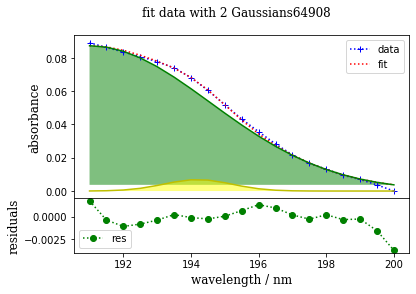

--------------G1----------------
amplitude = 0.79 (+/-) 0.03
center = 191.44 (+/-) 0.23
sigma = 3.16 (+/-) 0.13
--------------G2----------------
amplitude = 0.05 (+/-) 0.01
center = 193.88 (+/-) 0.06
sigma = 0.97 (+/-) 0.11


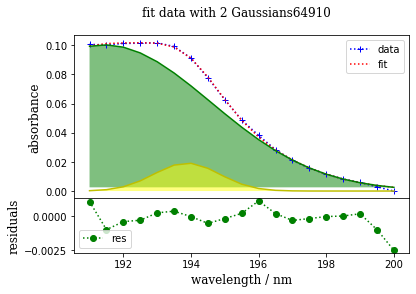

--------------G1----------------
amplitude = 0.83 (+/-) 0.02
center = 191.66 (+/-) 0.14
sigma = 2.99 (+/-) 0.08
--------------G2----------------
amplitude = 0.06 (+/-) 0.01
center = 193.80 (+/-) 0.03
sigma = 0.91 (+/-) 0.06


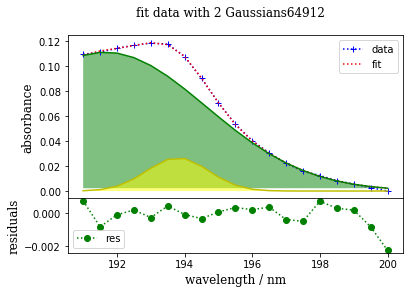

--------------G1----------------
amplitude = 0.85 (+/-) 0.02
center = 191.61 (+/-) 0.14
sigma = 2.96 (+/-) 0.08
--------------G2----------------
amplitude = 0.08 (+/-) 0.01
center = 193.77 (+/-) 0.03
sigma = 0.96 (+/-) 0.05


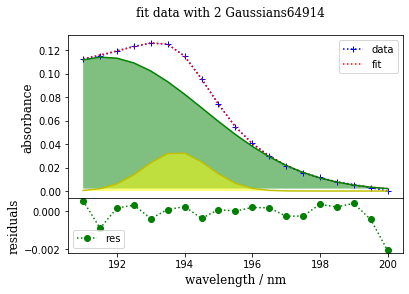

--------------G1----------------
amplitude = 0.88 (+/-) 0.02
center = 191.52 (+/-) 0.18
sigma = 3.02 (+/-) 0.10
--------------G2----------------
amplitude = 0.09 (+/-) 0.01
center = 193.75 (+/-) 0.03
sigma = 0.99 (+/-) 0.05


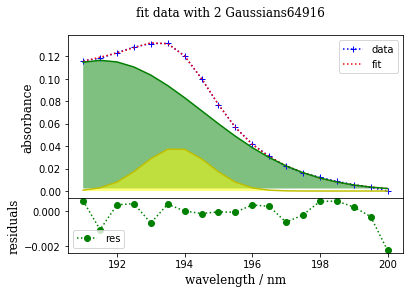

--------------G1----------------
amplitude = 0.86 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.88 (+/-) 0.08
--------------G2----------------
amplitude = 0.09 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.96 (+/-) 0.05


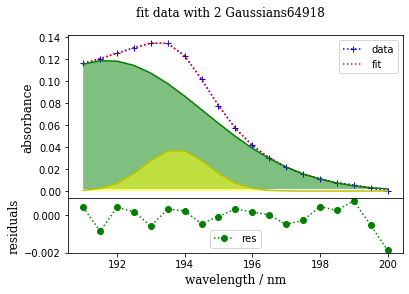

--------------G1----------------
amplitude = 0.88 (+/-) 0.02
center = 191.61 (+/-) 0.16
sigma = 2.93 (+/-) 0.09
--------------G2----------------
amplitude = 0.10 (+/-) 0.01
center = 193.75 (+/-) 0.03
sigma = 0.97 (+/-) 0.05


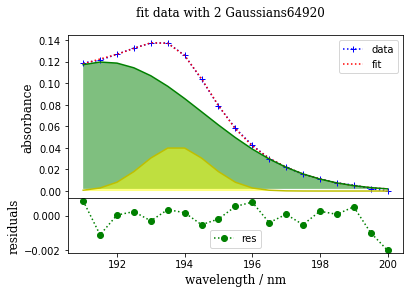

--------------G1----------------
amplitude = 0.87 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.86 (+/-) 0.08
--------------G2----------------
amplitude = 0.10 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.94 (+/-) 0.04


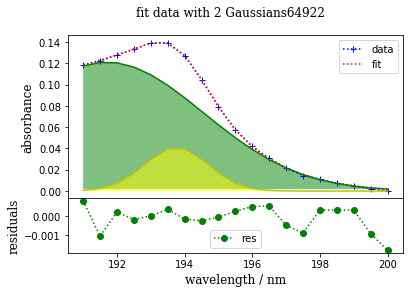

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.66 (+/-) 0.12
sigma = 2.92 (+/-) 0.07
--------------G2----------------
amplitude = 0.10 (+/-) 0.01
center = 193.74 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


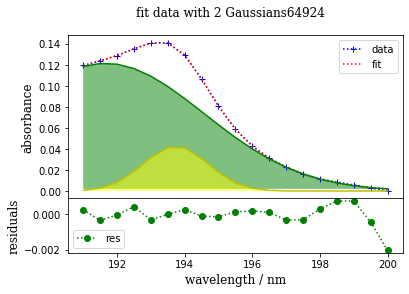

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.64 (+/-) 0.12
sigma = 2.90 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.97 (+/-) 0.04


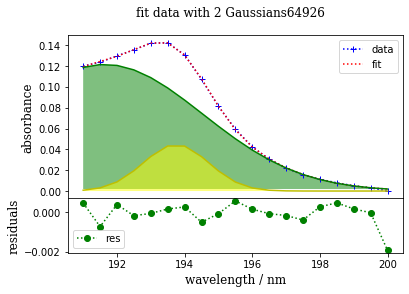

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.85 (+/-) 0.08
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


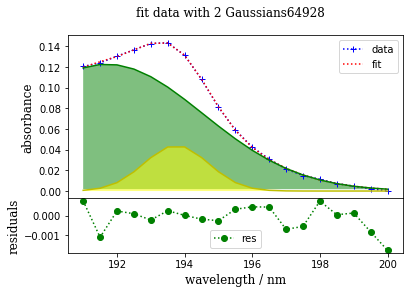

--------------G1----------------
amplitude = 0.90 (+/-) 0.02
center = 191.62 (+/-) 0.15
sigma = 2.92 (+/-) 0.09
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.98 (+/-) 0.04


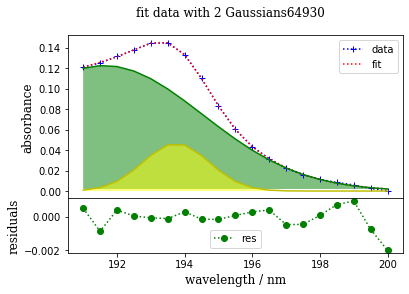

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.65 (+/-) 0.12
sigma = 2.89 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.74 (+/-) 0.02
sigma = 0.97 (+/-) 0.04


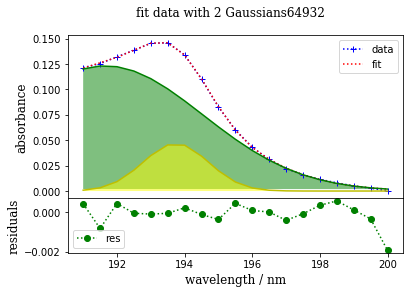

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.65 (+/-) 0.12
sigma = 2.88 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.98 (+/-) 0.03


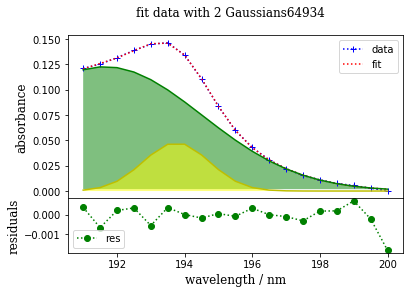

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


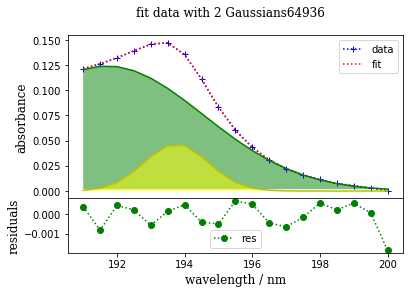

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.67 (+/-) 0.14
sigma = 2.87 (+/-) 0.08
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.74 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


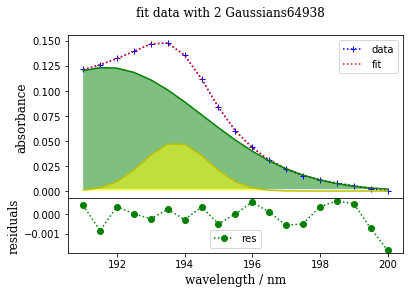

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.72 (+/-) 0.11
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


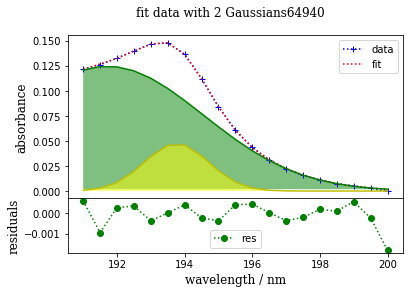

--------------G1----------------
amplitude = 0.92 (+/-) 0.02
center = 191.61 (+/-) 0.15
sigma = 2.94 (+/-) 0.09
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.74 (+/-) 0.02
sigma = 0.98 (+/-) 0.04


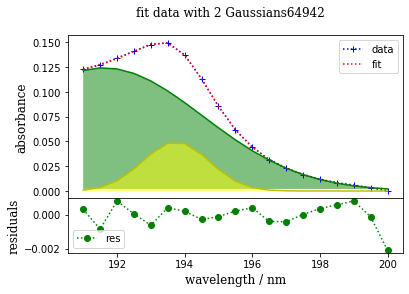

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.76 (+/-) 0.11
sigma = 2.83 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.94 (+/-) 0.04


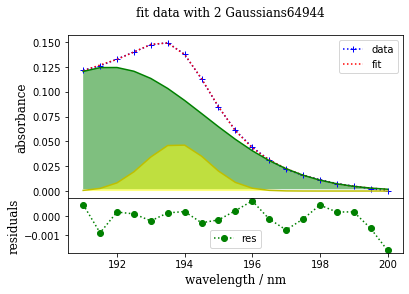

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.79 (+/-) 0.11
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.11 (+/-) 0.01
center = 193.77 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


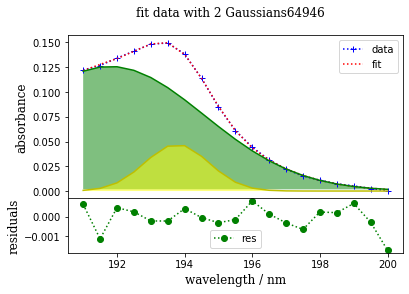

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.67 (+/-) 0.14
sigma = 2.89 (+/-) 0.08
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.75 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


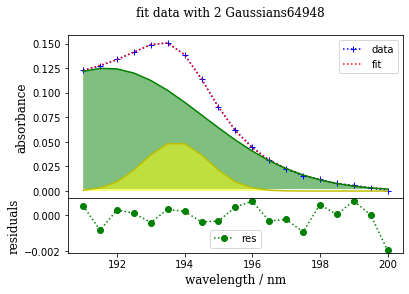

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.69 (+/-) 0.13
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


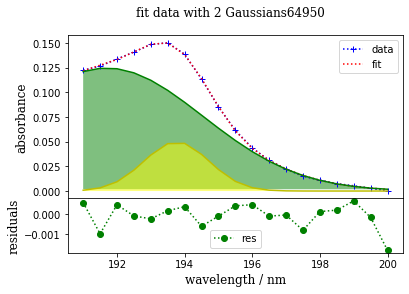

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.75 (+/-) 0.12
sigma = 2.84 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


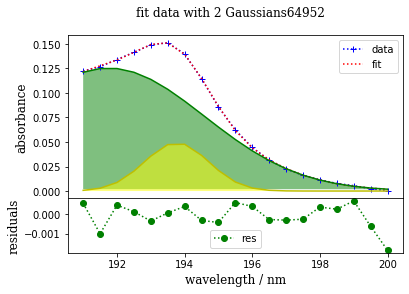

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.72 (+/-) 0.12
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


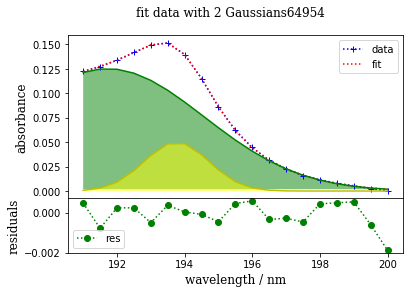

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.77 (+/-) 0.11
sigma = 2.83 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.77 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


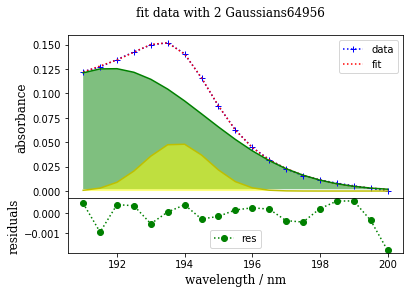

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.79 (+/-) 0.10
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


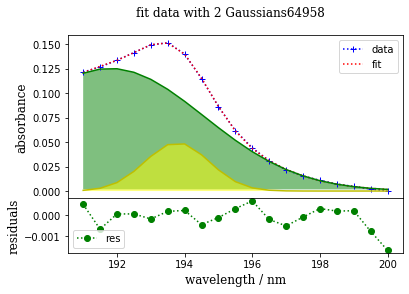

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.78 (+/-) 0.12
sigma = 2.82 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.77 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


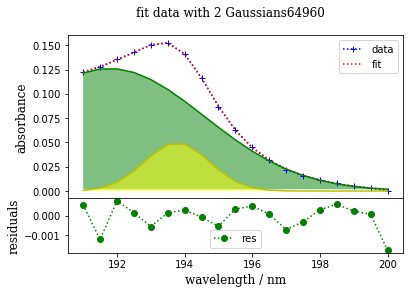

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.72 (+/-) 0.12
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.76 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


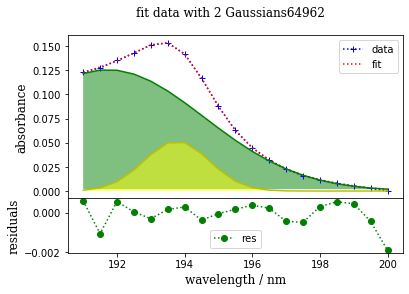

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.78 (+/-) 0.11
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


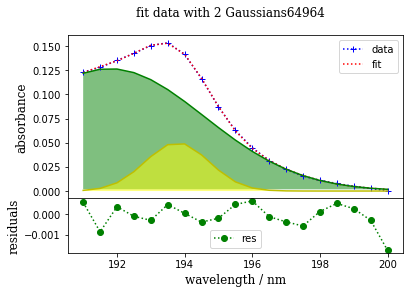

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.79 (+/-) 0.12
sigma = 2.81 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.94 (+/-) 0.04


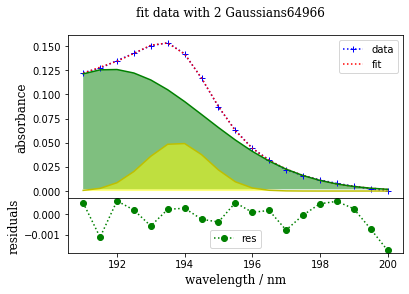

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.76 (+/-) 0.13
sigma = 2.82 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.77 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


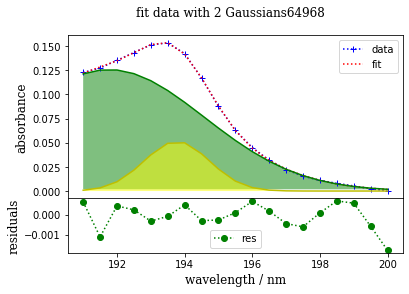

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.77 (+/-) 0.13
sigma = 2.84 (+/-) 0.08
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


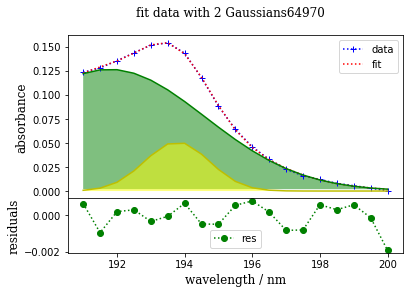

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.82 (+/-) 0.10
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.93 (+/-) 0.03


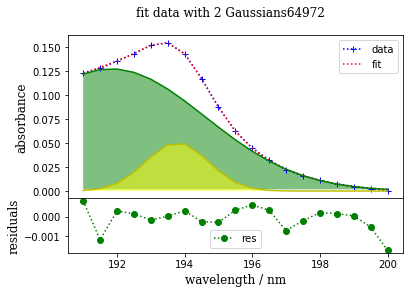

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.72 (+/-) 0.12
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


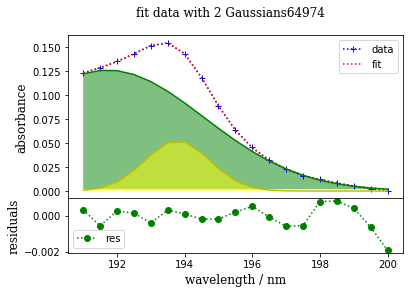

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.73 (+/-) 0.12
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


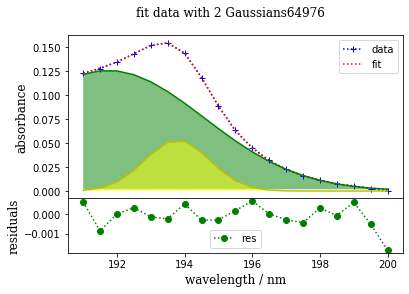

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.73 (+/-) 0.13
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.77 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


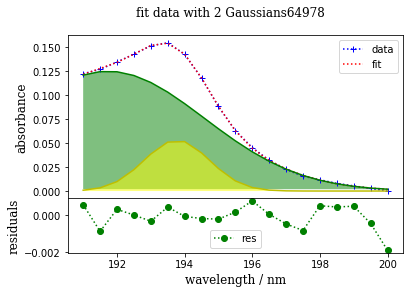

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.77 (+/-) 0.11
sigma = 2.83 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


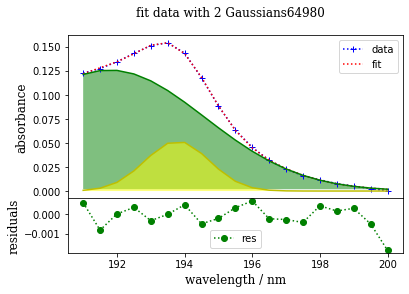

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.78 (+/-) 0.11
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.79 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


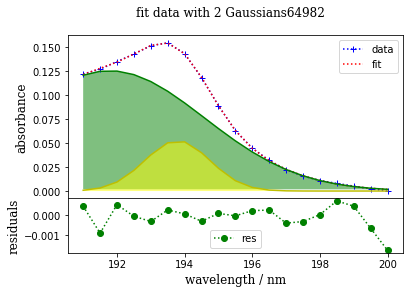

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.74 (+/-) 0.12
sigma = 2.84 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.79 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


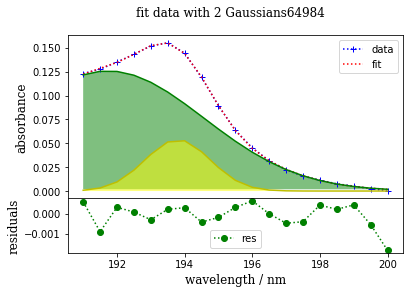

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.79 (+/-) 0.11
sigma = 2.83 (+/-) 0.07
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.79 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


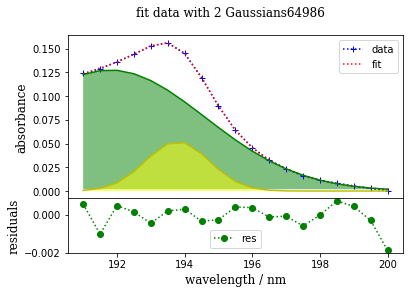

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.78 (+/-) 0.12
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


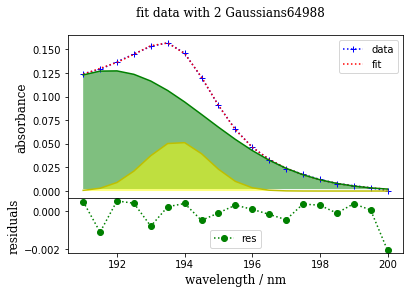

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.89 (+/-) 0.08
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


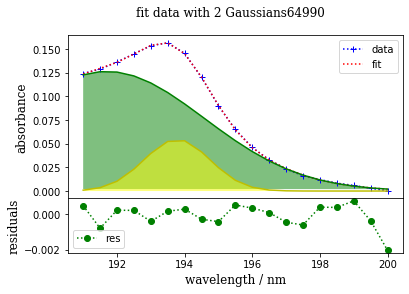

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.70 (+/-) 0.13
sigma = 2.90 (+/-) 0.08
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.78 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


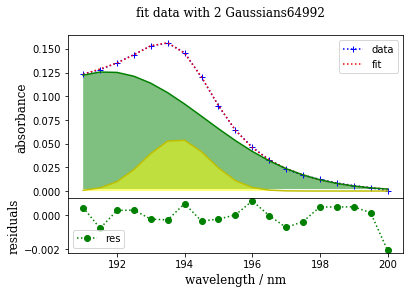

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.80 (+/-) 0.11
sigma = 2.82 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


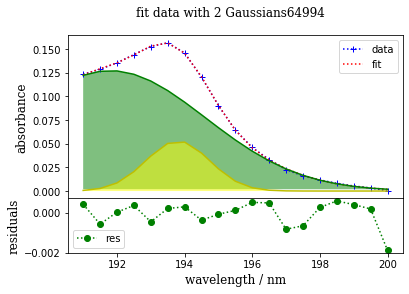

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.81 (+/-) 0.11
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.79 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


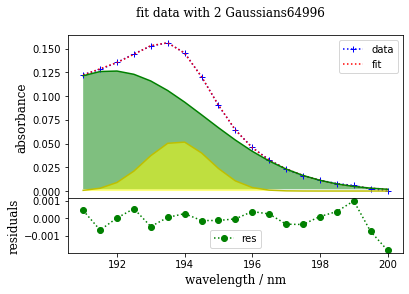

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.75 (+/-) 0.12
sigma = 2.84 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


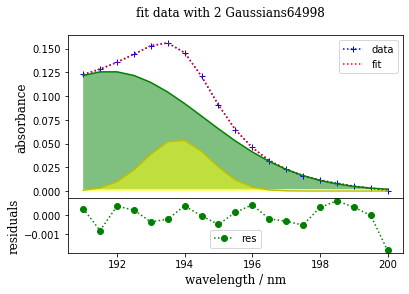

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.77 (+/-) 0.11
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


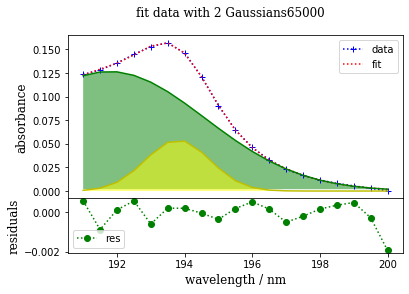

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.84 (+/-) 0.09
sigma = 2.79 (+/-) 0.05
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.01
sigma = 0.95 (+/-) 0.03


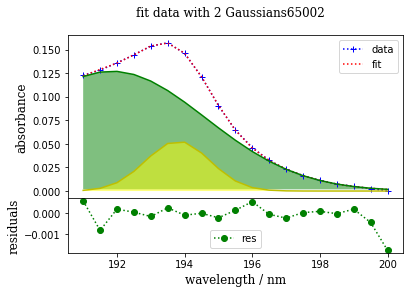

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.74 (+/-) 0.12
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


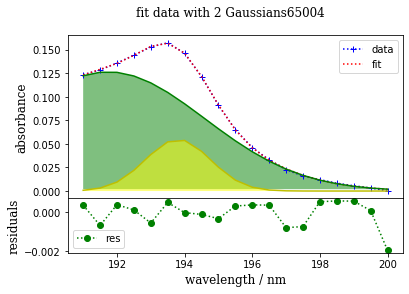

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.82 (+/-) 0.11
sigma = 2.82 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


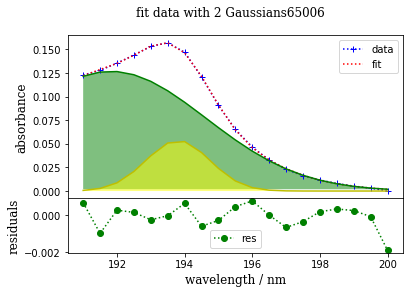

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.84 (+/-) 0.12
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.95 (+/-) 0.04


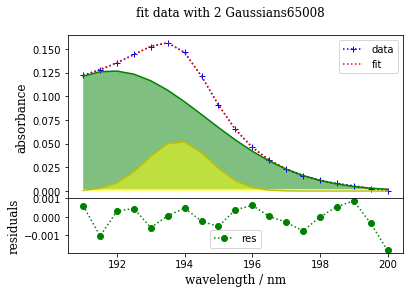

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.81 (+/-) 0.11
sigma = 2.82 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


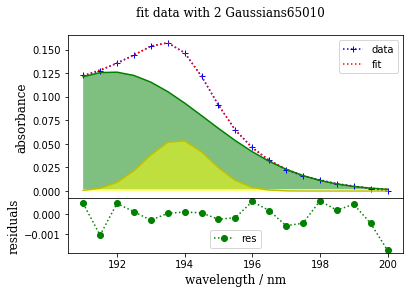

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.85 (+/-) 0.11
sigma = 2.80 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


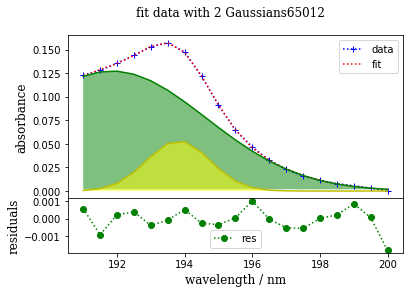

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.77 (+/-) 0.12
sigma = 2.84 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


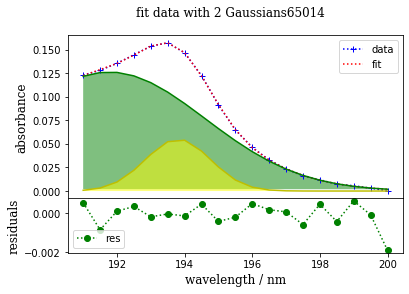

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.75 (+/-) 0.12
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


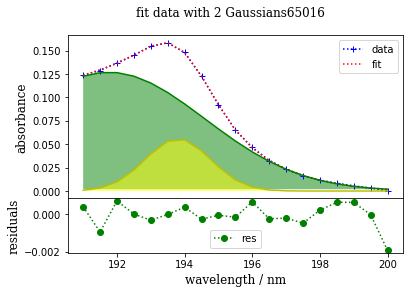

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.10
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


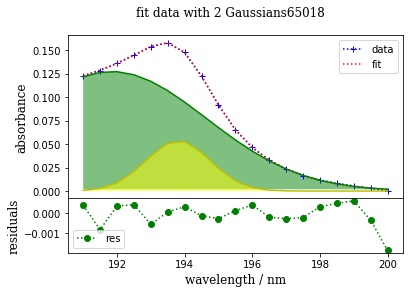

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.78 (+/-) 0.12
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


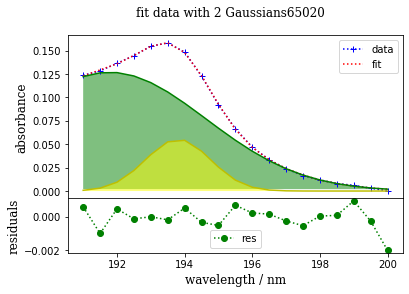

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.85 (+/-) 0.11
sigma = 2.81 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


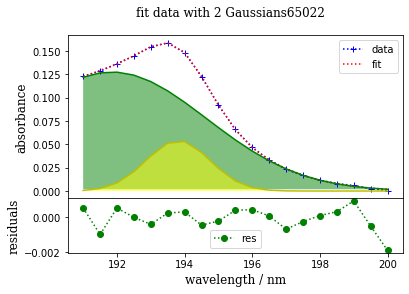

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.87 (+/-) 0.09
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.12 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.93 (+/-) 0.03


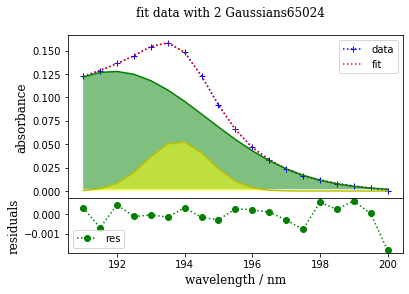

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.82 (+/-) 0.12
sigma = 2.83 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


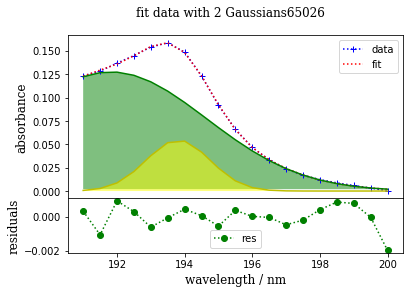

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.82 (+/-) 0.11
sigma = 2.82 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


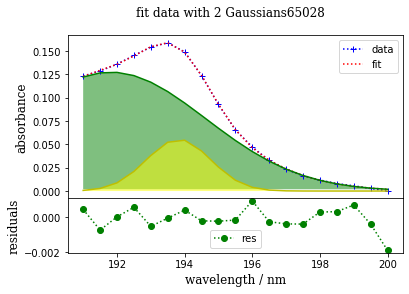

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.85 (+/-) 0.11
sigma = 2.80 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


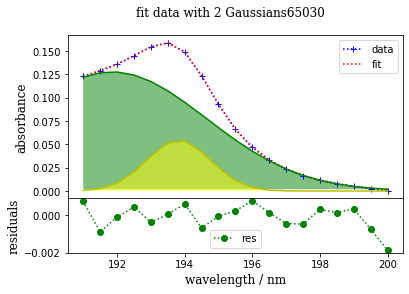

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.73 (+/-) 0.14
sigma = 2.88 (+/-) 0.08
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.80 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


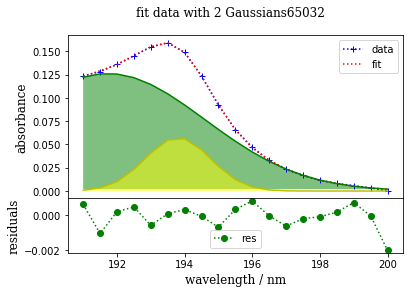

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.86 (+/-) 0.11
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


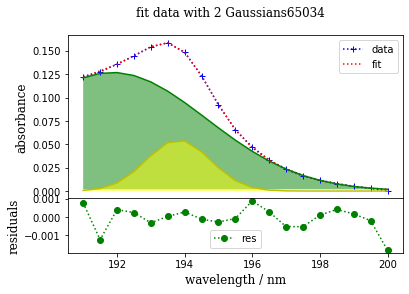

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.10
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


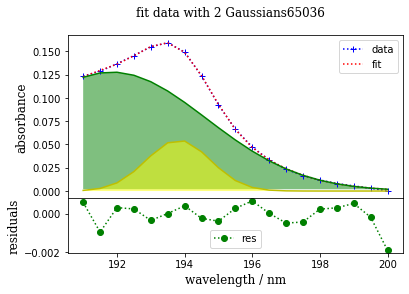

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.75 (+/-) 0.14
sigma = 2.87 (+/-) 0.08
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.81 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


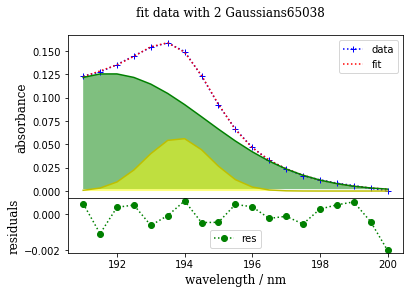

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.83 (+/-) 0.11
sigma = 2.80 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


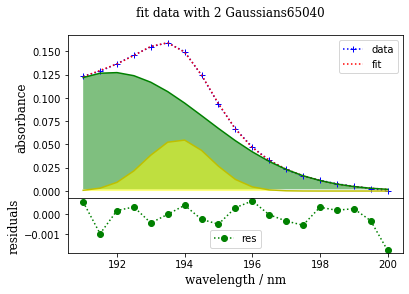

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.88 (+/-) 0.11
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.93 (+/-) 0.03


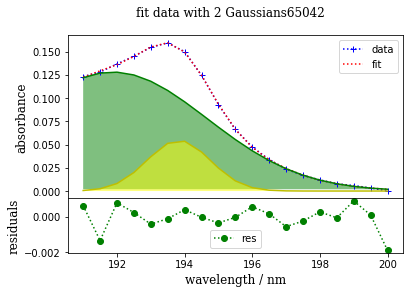

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.89 (+/-) 0.11
sigma = 2.81 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.92 (+/-) 0.03


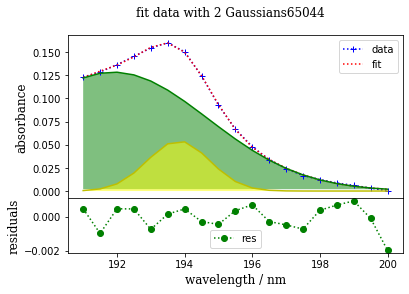

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.10
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


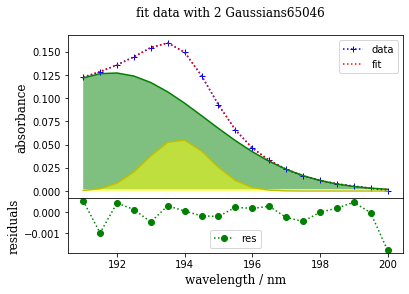

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.79 (+/-) 0.11
sigma = 2.84 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


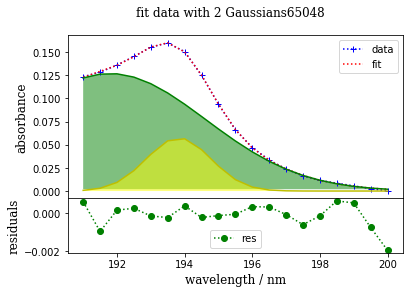

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.85 (+/-) 0.12
sigma = 2.79 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


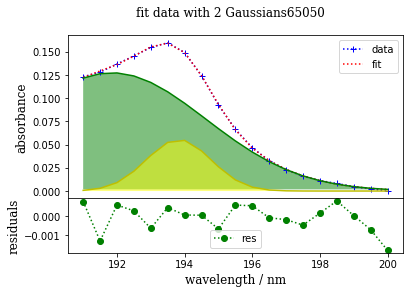

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.91 (+/-) 0.09
sigma = 2.75 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


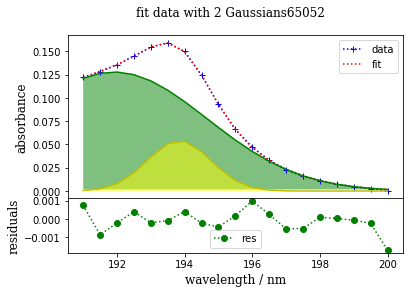

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.85 (+/-) 0.11
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


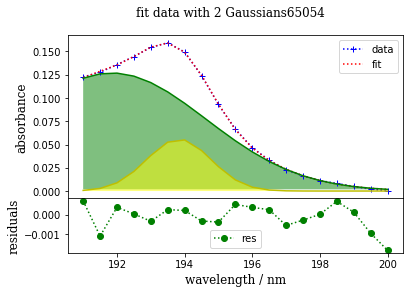

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.87 (+/-) 0.10
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


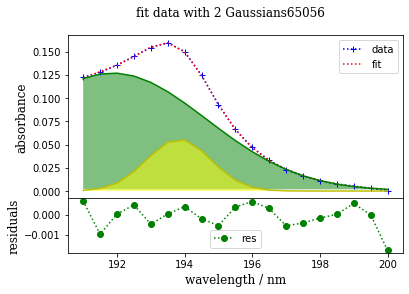

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.91 (+/-) 0.11
sigma = 2.76 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.93 (+/-) 0.03


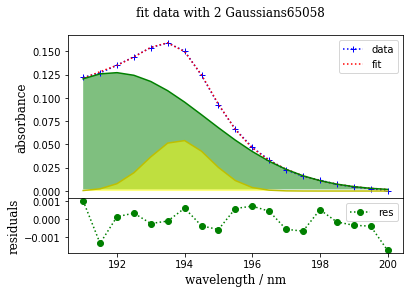

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.86 (+/-) 0.11
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


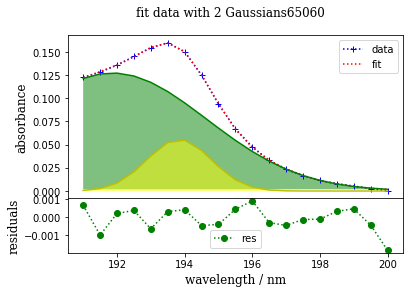

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.12
sigma = 2.82 (+/-) 0.07
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


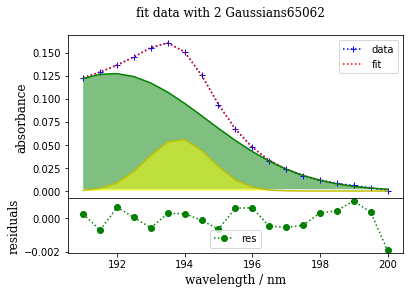

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.87 (+/-) 0.11
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


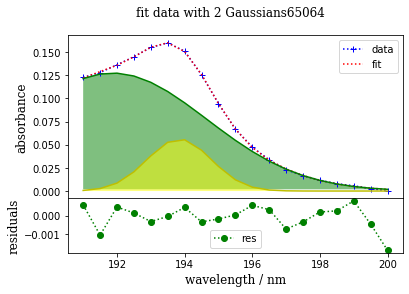

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.80 (+/-) 0.13
sigma = 2.86 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


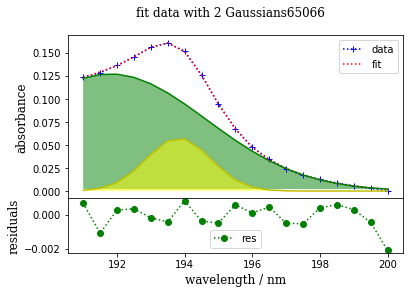

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.11
sigma = 2.81 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


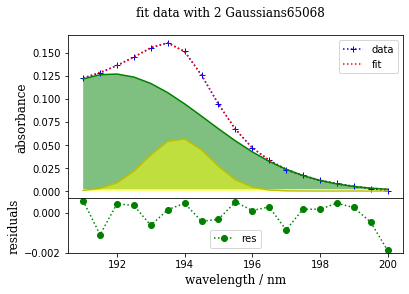

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.84 (+/-) 0.10
sigma = 2.81 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


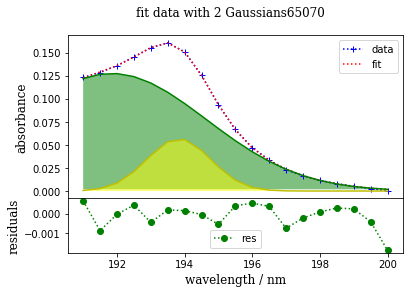

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.85 (+/-) 0.12
sigma = 2.80 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.83 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


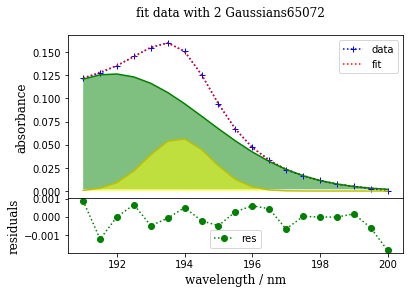

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.72 (+/-) 0.14
sigma = 2.88 (+/-) 0.08
--------------G2----------------
amplitude = 0.15 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


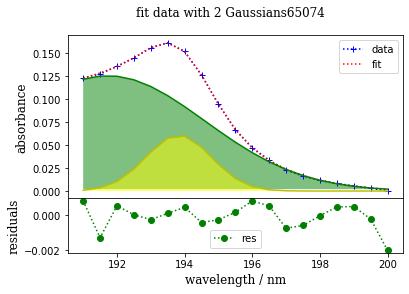

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.81 (+/-) 0.10
sigma = 2.82 (+/-) 0.06
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


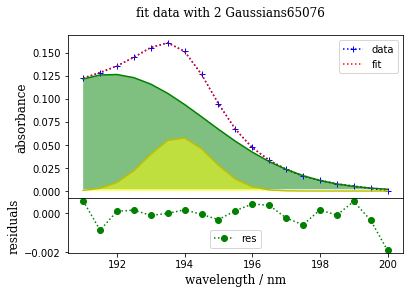

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.69 (+/-) 0.14
sigma = 2.91 (+/-) 0.08
--------------G2----------------
amplitude = 0.15 (+/-) 0.01
center = 193.82 (+/-) 0.02
sigma = 0.99 (+/-) 0.03


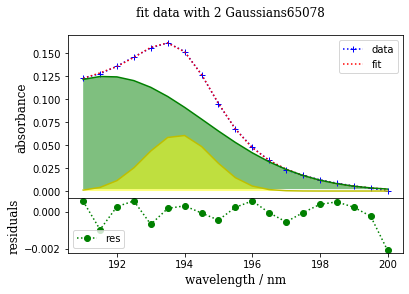

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.79 (+/-) 0.14
sigma = 2.82 (+/-) 0.08
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.96 (+/-) 0.04


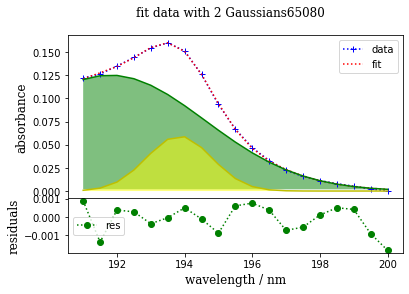

--------------G1----------------
amplitude = 0.91 (+/-) 0.01
center = 191.82 (+/-) 0.12
sigma = 2.85 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


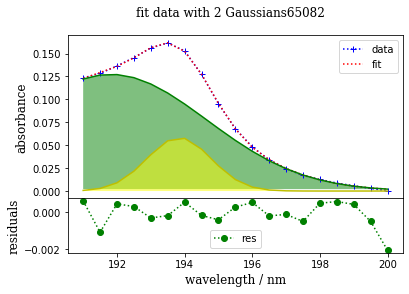

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.86 (+/-) 0.12
sigma = 2.78 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.96 (+/-) 0.03


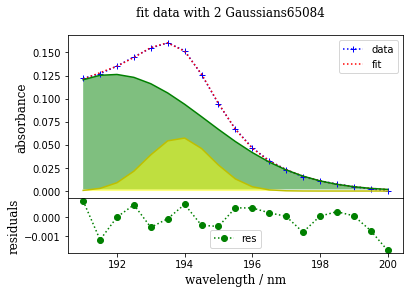

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.82 (+/-) 0.12
sigma = 2.81 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.97 (+/-) 0.03


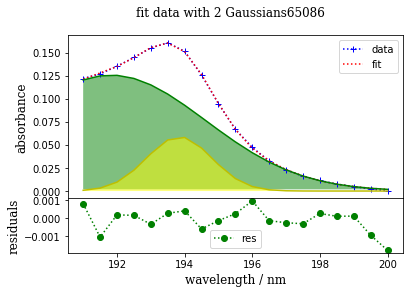

--------------G1----------------
amplitude = 0.88 (+/-) 0.01
center = 191.92 (+/-) 0.10
sigma = 2.75 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.93 (+/-) 0.03


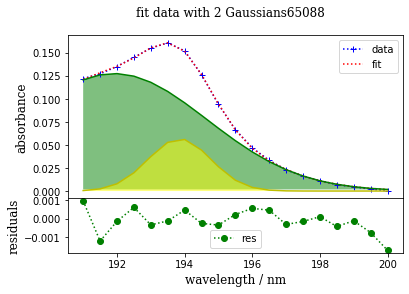

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.87 (+/-) 0.11
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.84 (+/-) 0.02
sigma = 0.95 (+/-) 0.03


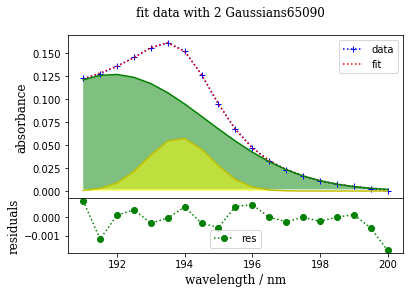

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.87 (+/-) 0.10
sigma = 2.79 (+/-) 0.06
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


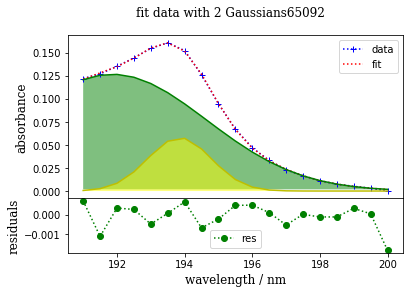

--------------G1----------------
amplitude = 0.89 (+/-) 0.01
center = 191.88 (+/-) 0.11
sigma = 2.79 (+/-) 0.07
--------------G2----------------
amplitude = 0.14 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


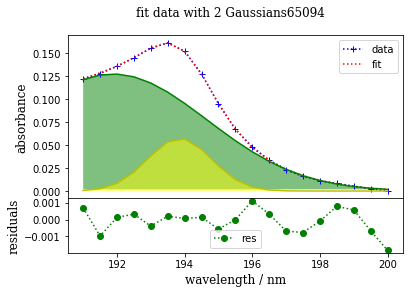

--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.86 (+/-) 0.10
sigma = 2.80 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


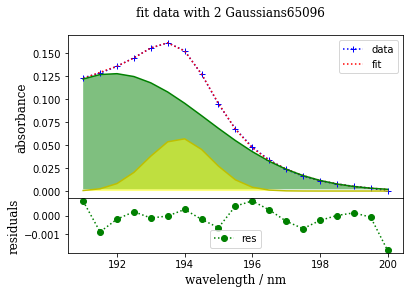

In [6]:
amplitudeG1 = np.array([])
amplitudeG2 = np.array([])

amplitude_err_G1 = np.array([])
amplitude_err_G2 = np.array([])

positionG2 = np.array([])
positionG1 = np.array([])

res = np.array([])

timestamp_raw = np.array([])

filenames=sorted(glob.glob('long\\R*.dat'))
#print(filenames)
#define each element in the filenames list as "f" and do lots of thing to each element
for f in filenames:
    shortf=f[6:11] # make a short version of each filename only including characters 6 through to 12
    #print(shortf)

    #and now take each element in the list, f, normalise to the beamcurrent making an array for each element as before
    it, it_curr = np.loadtxt(f, dtype=float, delimiter=None, skiprows=18, usecols=(1,6),  unpack=True)
    it_norm = it/it_curr*180

    #we now have a normalised bkg file and a normalised list of transmission files. next we calculate the absorbance for each element, f, in the list called filenames
    absorp=np.log10(i0_norm/it_norm)
    #print(absorp)

### attempt to fit multiple Gaussians

    #set a linear background by finding the minimum point on the curve and drawing a linear line here
    _bk=min(absorp)
    #print(_bk)
    
    #now substract thebackground from the data
    absorp_bk=absorp-_bk
    header='wavelength/nm, nor_absorb'
    #print(os.getcwd())
    os.chdir(working_dir+'\long\\normalised')
    #print(os.getcwd())
    with open(shortf+'absorp_bk.dat', mode='w') as absorb_bk_file:
        np.savetxt(absorb_bk_file,np.c_[wl,absorp_bk], delimiter=',', header=header)
    os.chdir(working_dir)
    
    
    #print(type(absorp_bk))
    #plt.plot(wl,absorp_bk)
     
    #First define what a single Gaussian looks like 
    def _1gaussian(wl,amp1,cen1,sigma1):
        return (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen1)/sigma1)**2))))


    #FAnd now define a two-Gaussian function, each with x values (wl), an amplitude, a center and a Sigma
    def _2gaussian(wl,amp1,cen1,sigma1,amp2,cen2,sigma2):
        return (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen2)/sigma2)**2))))

    #now make good guesses for the value of the parameters
    #init_vals = [0.23, 0.5, 123, 5]  # for [amp, cen, wid]
    #and now ask curve fit to take these initial guesses and fit the Gaussian function to the x,y (wl, absorp) data
    #best_vals, covar = curve_fit(gaussian, wl, absorp, p0=init_vals)
        
    init_vals=[0.78, 191.1, 3, 0.05, 194.0,0.9] # for [amp1, cen1, simgma1, amp2, cen2, simgma2]
    popt_2gauss, pcov_2gauss = curve_fit(_2gaussian, wl, absorp_bk, p0=init_vals, bounds=([0.7,191,2.5,0,193,0.5],[2,192,6,0.9,194.2,1])
                                        ) #use the bonds argument to add limits to the parameters, 
                                            #the first braket gives the lower limit for all parameteres 
                                            #and the second brecket gives the upper limit
    perr_2gauss = np.sqrt(np.diag(pcov_2gauss)) # calculate the err on the fit
    residual_2gauss = absorp_bk - (_2gaussian(wl, *popt_2gauss)) # make a function to subtract the fit from the data called residuals
    residuals=sum((absorp_bk-(_2gaussian(wl, *popt_2gauss)))**2)
    res=np.append(res,(residuals))
        
    
    pars_1 = popt_2gauss[0:3] # divide the output parameteres into to arrays, one for the first Gaussian and a 2nd for Gaussian 2
    pars_2 = popt_2gauss[3:6]
    pars_err_1 = perr_2gauss[0:3] # divide the output parameteres into to arrays, one for the first Gaussian and a 2nd for Gaussian 2
    pars_err_2 = perr_2gauss[3:6]
    #Define a variable to process these fit values into as arrays:
    gauss_peak_1 = _1gaussian(wl, *pars_1)
    gauss_peak_2 = _1gaussian(wl, *pars_2)
    
### look at the results
    print('--------------G1----------------')
    print ("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], pars_err_1[0]))
    print ("center = %0.2f (+/-) %0.2f" % (pars_1[1], pars_err_1[1]))
    print ("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], pars_err_1[2]))

    print('--------------G2----------------')
    print ("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], pars_err_2[0]))
    print ("center = %0.2f (+/-) %0.2f" % (pars_2[1], pars_err_2[1]))
    print ("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], pars_err_2[2]))

### Now I want to export the amplitude for each element f and associate it with a timestamp
    amplitudeG1=np.append(amplitudeG1,(pars_1[0]))
    amplitude_err_G1=np.append(amplitude_err_G1,(pars_err_1[0]))
    amplitudeG2=np.append(amplitudeG2,(pars_2[0]))
    amplitude_err_G2=np.append(amplitude_err_G2,(pars_err_2[0]))
    positionG1=np.append(positionG1,(pars_1[1]))
    positionG2=np.append(positionG2,(pars_2[1]))
    
   
    #use the os command to move up and down beween directories to save the fit data
    #print(os.getcwd())
    os.chdir(working_dir+'\long')
    os.chdir(working_dir+'\long\GaussianFits')
    #print(os.getcwd())
    with open(shortf+'_fitG1.dat', mode='w') as fitfileG1:
        np.savetxt(fitfileG1,np.c_[wl,gauss_peak_1])
    with open(shortf+'_fitG2.dat', mode='w') as fitfileG2:
        np.savetxt(fitfileG2,np.c_[wl,gauss_peak_2])
    with open(shortf+'_fit.dat', mode='w') as fitfile_all:
        np.savetxt(fitfile_all,np.c_[wl,_2gaussian(wl,*popt_2gauss)])

    os.chdir(working_dir)
    #print(os.getcwd())
     
    #and associate a timestamp with each element f, note that I make the time stamp the first time value for that file, it could easily be the last instead!
    time = np.loadtxt(f, dtype=str, delimiter=None, skiprows=16, usecols=(9), unpack=True)
    a=float(get_sec(time[1]))
    timestamp_raw=np.append(timestamp_raw,(a))

            
### Finally plot the results
    
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]}) # I am making a 2 x 1 row x column grid, when the first row is 3 times the height ofthe2nd
# Remove horizontal space between axes
    fig.subplots_adjust(hspace=0)
    
    fig.suptitle('fit data with 2 Gaussians'+shortf, family="serif", fontsize=12)
    plt.xlabel('wavelength / nm', family="serif", fontsize=12)
    axs[1].plot(wl,residual_2gauss,'go:',label='res')
    axs[1].legend() 
    axs[1].set_ylabel("residuals",family="serif", fontsize=12)  
    axs[0].plot(wl,absorp_bk,'b+:',label='data')
    axs[0].plot(wl,_2gaussian(wl,*popt_2gauss),'r:',label='fit')
    axs[0].legend()
    axs[0].plot(wl, gauss_peak_1, "g")
    axs[0].fill_between(wl, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
    axs[0].set_ylabel("absorbance",family="serif", fontsize=12)    
    axs[0].plot(wl, gauss_peak_2, "y")
    axs[0].fill_between(wl, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
    
    plt.show() #This command would plot a different graph for each f
    
    fig.savefig(basename+' 2G fit to last time point', dpi=300, bbox_inches='tight')
#print(res)
#print(amplitudeG1)



In [6]:
#plot the residuals for each fit as a function of f
os.chdir(working_dir)
time0=timestamp_raw[0]
timestamp=timestamp_raw-time0
with open(basename+'_res.dat', mode='w') as res_file:
    np.savetxt(res_file, np.c_[timestamp,res], delimiter=',', header='timestamp / s, res_'+basename)
os.chdir(working_dir)
plt.plot(timestamp,res, 'r+')

NameError: name 'timestamp_raw' is not defined

The box below will generate a list of filenames in the normalised folder, and add each file to a plot. It cannot save this figure though!

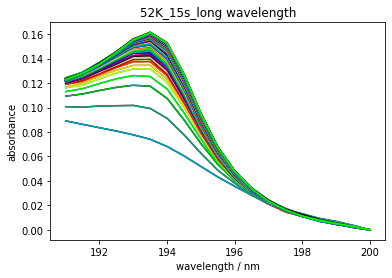

In [7]:
#print(os.getcwd())
os.chdir(working_dir+'\\long\\normalised')
#print(os.getcwd())
plotfilenames=sorted(glob.glob('*absorp_bk.dat'))
#print(plotfilenames)
for g in plotfilenames:
    #print(g)
    wl, absorp_bk = np.loadtxt(g, dtype=float, delimiter=',', skiprows=1, usecols=(0,1), unpack=True)
    #print(wl)
    
    plt.plot(wl,absorp_bk)
    plt.xlabel('wavelength / nm')
    plt.ylabel('absorbance')
    plt.title(basename+' wavelength')
plt.show()
os.chdir(r'C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis\52K_15s')
#plt.savefig(basename+'_allplots', dpi=300)
#fig.savefig(basename+'_parameters v time', dpi=300)



The box below takes files in a folder and adds them to a dataframe. we can then plot the dataframe and save the result.

(19, 380)
save plot in the route


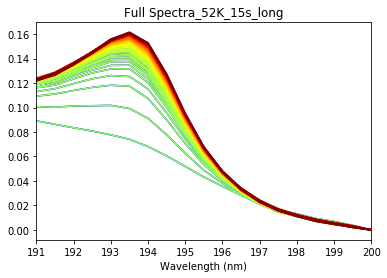

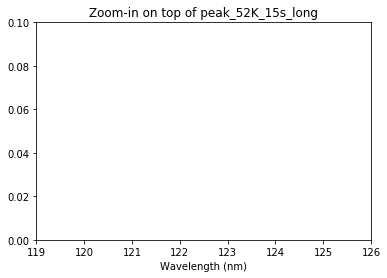

In [9]:
#define an empty array that will hold each file as it appears from the glob function
os.chdir(working_dir+'\\long\\normalised') 


df_list = []
#print('start '+working_dir)
#print(os.getcwd())

plotfilenames=sorted(glob.glob('*absorp_bk.dat'))

#print(plotfilenames)
for g in plotfilenames:
    df_list.append(pd.read_csv(g, header=0).assign())
    

big_df = pd.concat(df_list, ignore_index=False, axis=1)

print(np.shape(big_df))
big_df.head()

big_df = big_df.astype(float)

big_df.rename(columns={'# wavelength/nm': 'Wavelength (nm)'}, inplace= True)  

cols1=[]
count1=1 
for column in big_df.columns:
    if column == 'Wavelength (nm)':
        cols1.append(f'Wavelength (nm)_{count1}')
        count1+=1
        continue
    cols1.append(column)
big_df.columns = cols1

cols2=[]
count2=1 

for column in big_df.columns:
    if column == ' nor_absorb':
        cols2.append(f'nor_absorb_{count2}')
        count2+=1
        continue
    cols2.append(column)
big_df.columns = cols2

big_df.rename(columns={'Wavelength (nm)_1': 'Wavelength (nm)'}, inplace= True)
big_df = big_df.set_index('Wavelength (nm)')

interval=(np.shape(big_df)[1]/2)+0.5
interval=int(interval)
#print(type(interval))
stringBase = 'Wavelength (nm)'
stringArray = []
for i in range(1, interval):
    temp_string = stringBase+'_'+str(i+1)
    stringArray.append(temp_string)

#print (stringArray[5:10]) #start at _5 and finish at column _10

big_df.head()
big_df.drop(stringArray, inplace=True, axis=1)
big_df_columnNames = big_df.columns.to_numpy().tolist()
big_df.to_csv("Combined.dat", header=False, index=True)

#fig, axs = plt.subplots(1, 1, sharex=True)

#ax1 = fig.add_subplot([0])
#print('about to plot'+working_dir)
#print(os.getcwd())
os.chdir(working_dir)
print('save plot in the route')
#print(os.getcwd())
big_df.plot(y=big_df_columnNames,legend=False,colormap='jet',title='Full Spectra_'+basename)
plt.savefig(basename+'_allplots', dpi=300, bbox_inches='tight')
big_df.plot(y=big_df_columnNames,legend=False,colormap='jet',xlim=(119,126), ylim=(0.0,0.1),title='Zoom-in on top of peak_'+basename)
plt.savefig(basename+'_allplots_zoom', dpi=300, bbox_inches='tight')



Now we want to take the arrays that we made for amplitude and time above and export these arrays into a text file for later use

Make sure that you come back to the correct working directory afterwards!

C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis\time_resolved_data
you are now working in directory C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis\52K_15s


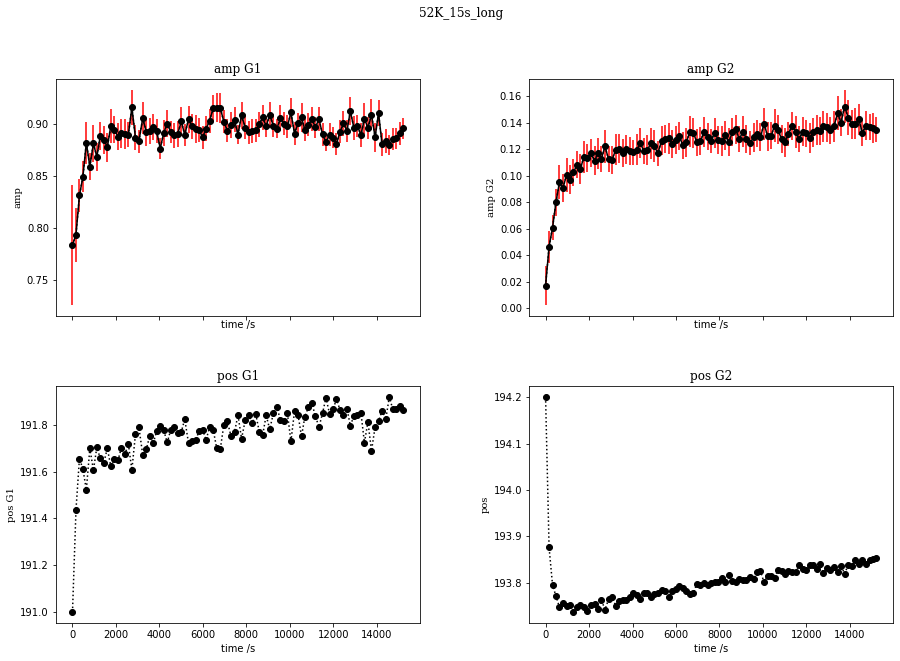

In [10]:
#print(amplitude)
#print(timestamp_raw)
time0=timestamp_raw[0]
timestamp=timestamp_raw-time0
#print(timestamp)

fig, axs = plt.subplots(2, 2, sharex=True, gridspec_kw={'height_ratios':[1,1]}, figsize=(15,10)) # I am making a 2 x 2 row x column grid, with equal heights
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)

fig.suptitle(basename, family="serif")
#plt.xlabel('time / s', family="serif")
axs[0,0].set_ylabel("amp",family="serif") 
axs[0,0].set_title("amp G1",family="serif")
axs[0,0].plot(timestamp,amplitudeG1,'ko:')
axs[0,0].errorbar(timestamp,amplitudeG1,yerr=amplitude_err_G1, ecolor='r')

axs[0,1].plot(timestamp,amplitudeG2,'ko:')
axs[0,1].set_title("amp G2",family="serif") 
axs[0,1].set_ylabel("amp G2",family="serif") 
axs[0,1].errorbar(timestamp,amplitudeG2,yerr=amplitude_err_G2, ecolor='r')

axs[1,1].set_ylabel("pos",family="serif") 
axs[1,1].set_title("pos G2",family="serif") 
axs[1,1].plot(timestamp,positionG2,'ko:')
#axs[1,1].errorbar(timestamp,positionG2,yerr=position_err_G2, ecolor='r')

axs[1,0].set_ylabel("pos G1",family="serif")  
axs[1,0].set_title("pos G1",family="serif") 
axs[1,0].plot(timestamp,positionG1,'ko:')
#axs[0,0].errorbar(timestamp,positionG1,yerr=position_err_G1, ecolor='r')

for ax in axs.flat:
    ax.set(xlabel='time /s')
    
#for ax in axs.flat:
    #ax.label_outer()

fig.savefig(basename+'_parameters v time', dpi=300)

#Save the best fit parameters to a text file for later use
with open(basename+'_fits.dat', mode='w') as fitfile:
    np.savetxt(fitfile,(np.c_[popt_2gauss])) #note that the np.c_command makes columns instead of rows!

os.chdir(r'C:\Users\au302163\Documents\VUV_Python analysis\Follow up data analysis\time_resolved_data')
print(os.getcwd())
with open(basename+'.dat', mode='w') as timefile:
    np.savetxt(timefile,(np.c_[timestamp,amplitudeG2,amplitude_err_G2])) #note that the np.c_command makes columns instead of rows!
#with open(basename+'.dat', mode='w') as timefile:
#    np.savetxt(timefile,(np.c_[timestamp,amplitudeG2])) 

#with open(shortf+'_errG1.dat', mode='w') as errfileG1:
#    np.savetxt(errfileG1,np.c_[wl,amplitude_err_G1])
#with open(shortf+'_errG2.dat', mode='w') as errfileG2:
#    np.savetxt(errfileG2,np.c_[wl,amplitude_err_G2])
os.chdir(working_dir)
print('you are now working in directory'+' '+os.getcwd())



The cell below can be ignored or used as an example of how to fit a Gaussian!

#attempt to fit a Gaussian

#First define a Gaussian function, x values (wl), an amplitude, a center and a FWHM
def gaussian(wl, amp, cen, wid):
    return amp * exp(-(wl-cen)**2 / wid)
print('original data:',wl,absorp, sep='\n')

#now make good guesses for the value of the parameters
init_vals = [0.5, 123, 5]  # for [amp, cen, wid]
#and now ask curve fit to take these initial guesses and fit the Gaussian function to the x,y (wl, absorp) data
best_vals, covar = curve_fit(gaussian, wl, absorp, p0=init_vals)
#now generate a new array that contains the results of the fit and call this array curvefit
testfit=best_vals[0] * exp(-(wl-best_vals[1])**2 / best_vals[2])

#The resulting fit values are output as the best vals array
print()
print('bestfit parameters (amp, positions, FWHM): {}'.format(best_vals))
print()
print('fit results:',wl,testfit,sep='\n')
with open('test_fit.dat', mode='w') as testfitfile: #this generates a new .dat called curvefile
          #print(str(ans),str(wl),file=testfit, sep='\n') # this prints the values to curvefile
        np.savetxt(testfitfile,(wl,testfit))

#Finally plot the results
plt.plot(wl,absorp,'b+:',label='data')
plt.plot(wl,gaussian(wl,*best_vals),'ro:',label='fit')
plt.legend()
plt.title('attempt to fit data with a Gaussian')
plt.xlabel('wavelength / nm')
plt.ylabel('absorbance')
plt.show()